# Data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv', header = None)
df = df.set_index(df.columns[0])
# dtf = dtf.set_index("user_id")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,952,953,954,955,956,957,958,959,960,961
0,,,,,,,,,,,,,,,,,,,,,
1,-1.8226,8.51070,-0.53551,-2.03440,2.2282,2.04870,-5.81380,-4.4169,2.3129,0.808290,...,-5.74060,12.5650,41.23100,-6.77570,1.72780,15.9120,23.583000,3.9158,35.7250,1
2,1.2816,-0.49410,-0.19667,1.05510,-1.9280,1.07120,-0.19667,-4.6669,3.8230,-3.245900,...,-20.50300,47.7540,2.88560,-6.86660,6.29350,-4.8789,-1.300100,-1.4275,-3.4192,1
3,-2.0304,-0.27552,-0.58236,-5.95250,7.3550,2.16640,-4.71510,17.1580,15.5120,-0.822280,...,-10.71800,-4.5436,1.38680,-5.32100,-6.08350,-1.3021,-10.569000,-4.2189,-1.6538,1
4,-1.0026,0.41320,0.62058,-0.34226,-0.2027,-0.92619,0.61123,-2.0824,-3.5442,-0.043659,...,-2.90100,4.5538,-0.77261,4.25520,0.27911,4.7744,-5.695200,-18.7410,58.3810,1
5,1.2754,25.84200,5.80000,2.89000,3.1957,4.45040,5.99760,-6.4947,2.9189,3.202700,...,-0.97276,3.8810,7.13330,0.70157,-1.69570,1.2263,-0.093752,-1.7140,2.5131,1


In [15]:
submission_test= pd.read_csv('test.csv', header=None)
submission_test = submission_test.set_index(submission_test.columns[0])
submission_test.head()

,1,2,3,4,5,6,7,8,9,10,...,951,952,953,954,955,956,957,958,959,960
0,,,,,,,,,,,,,,,,,,,,,
1,0.93652,-0.32644,2.02410,-1.996400,-2.600600,2.30860,-8.25920,-9.209900,2.88510,0.34574,...,15.2500,-0.13846,-3.11080,2.0895,2.5293,5.84900,-4.9897,4.75810,5.1081,-2.9497
2,1.93410,-2.58880,-5.27190,10.809000,-5.624800,-15.28800,18.15000,-8.198600,-25.02300,21.76300,...,-112.6000,215.56000,-169.93000,-97.7360,123.8600,-47.75700,8.5216,133.73000,-21.5210,-2.8799
3,0.15171,-0.32254,0.54372,-0.001275,-0.036333,0.01976,-0.15681,0.040158,-0.38437,0.48062,...,9.5563,2.49110,-0.79551,6.1167,1.9027,-5.27980,3.5594,0.87136,-5.3856,3.5791
4,-3.99490,-7.74780,15.75800,-5.631000,-11.692000,4.41430,-10.73100,-16.211000,0.74900,-16.25500,...,109.6000,62.72700,153.11000,-128.9800,-93.6470,224.45000,-141.1200,-135.44000,220.6000,-131.4100
5,-10.13300,-31.76300,32.31000,-12.476000,-3.226600,19.49200,-8.83500,3.977800,14.96800,-1.39250,...,1.0905,16.74200,10.98200,18.1190,-1.6926,-0.31062,2.4190,1.15070,-2.8109,9.8108


In [5]:
df.shape
df.iloc[:,960].value_counts()

3     590
9     586
6     580
8     580
2     579
10    579
1     578
5     577
4     571
7     570
13    196
12    195
20    195
16    194
19    193
17    193
14    190
18    190
11    190
15    190
21     98
27     98
24     98
26     98
28     97
23     97
22     97
29     97
25     96
30     95
33     49
40     49
38     49
37     49
31     49
32     48
35     48
39     48
34     48
36     47
42     25
48     24
47     24
41     24
49     24
44     24
45     24
46     24
43     24
Name: 961, dtype: int64

/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


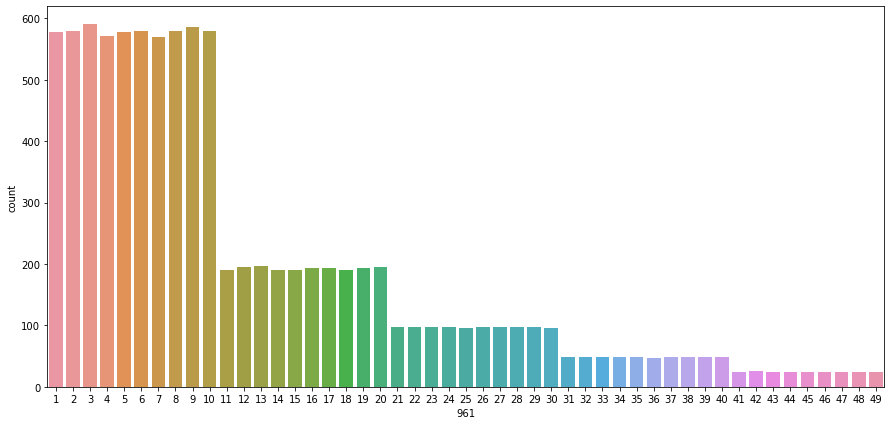

In [6]:
# plot the respective classes
f = plt.figure(figsize=(15,7))
g = sns.countplot(df.iloc[:,960])
plt.show()

In [7]:
# check for null values
df.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
957    0
958    0
959    0
960    0
961    0
Length: 961, dtype: int64

In [ ]:

# df = df.sample(frac = 1)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_test = test_df.iloc[:,:-1]
# y_test = test_df.iloc[:,-1]
print("x_train shape:", x_train.shape, "| y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "| y_test shape:", y_test.shape)

x_train shape: (7510, 960) | y_train shape: (7510,)
x_test shape: (1878, 960) | y_test shape: (1878,)


In [39]:
# display(x_test)

# Resampling Technique

We will use random undersampling, random oversampling, Tomek Links (Undersampling), and SMOTE for the first half of this experiment.

In [9]:
"""
1. Random Undersampling
"""
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x_train, y_train)
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({5: 472, 3: 468, 7: 468, 6: 465, 4: 465, 2: 464, 9: 462, 1: 458, 8: 457, 10: 446, 14: 163, 17: 162, 12: 161, 19: 156, 16: 155, 20: 155, 18: 154, 15: 153, 11: 151, 13: 146, 22: 85, 29: 81, 25: 77, 23: 77, 27: 76, 21: 75, 26: 75, 28: 75, 24: 73, 30: 72, 33: 45, 37: 42, 34: 42, 38: 40, 35: 40, 32: 39, 39: 39, 40: 36, 31: 35, 36: 35, 41: 20, 49: 20, 44: 19, 43: 19, 42: 19, 48: 19, 47: 18, 46: 18, 45: 18})
Resample dataset shape Counter({1: 18, 2: 18, 3: 18, 4: 18, 5: 18, 6: 18, 7: 18, 8: 18, 9: 18, 10: 18, 11: 18, 12: 18, 13: 18, 14: 18, 15: 18, 16: 18, 17: 18, 18: 18, 19: 18, 20: 18, 21: 18, 22: 18, 23: 18, 24: 18, 25: 18, 26: 18, 27: 18, 28: 18, 29: 18, 30: 18, 31: 18, 32: 18, 33: 18, 34: 18, 35: 18, 36: 18, 37: 18, 38: 18, 39: 18, 40: 18, 41: 18, 42: 18, 43: 18, 44: 18, 45: 18, 46: 18, 47: 18, 48: 18, 49: 18})


In [10]:
"""
2. Random Oversampling
"""
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x_train, y_train)
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({5: 472, 3: 468, 7: 468, 6: 465, 4: 465, 2: 464, 9: 462, 1: 458, 8: 457, 10: 446, 14: 163, 17: 162, 12: 161, 19: 156, 16: 155, 20: 155, 18: 154, 15: 153, 11: 151, 13: 146, 22: 85, 29: 81, 25: 77, 23: 77, 27: 76, 21: 75, 26: 75, 28: 75, 24: 73, 30: 72, 33: 45, 37: 42, 34: 42, 38: 40, 35: 40, 32: 39, 39: 39, 40: 36, 31: 35, 36: 35, 41: 20, 49: 20, 44: 19, 43: 19, 42: 19, 48: 19, 47: 18, 46: 18, 45: 18})
Resample dataset shape Counter({15: 472, 3: 472, 6: 472, 1: 472, 47: 472, 16: 472, 18: 472, 25: 472, 20: 472, 46: 472, 14: 472, 7: 472, 4: 472, 10: 472, 8: 472, 9: 472, 2: 472, 24: 472, 12: 472, 29: 472, 5: 472, 30: 472, 32: 472, 22: 472, 21: 472, 17: 472, 37: 472, 26: 472, 23: 472, 19: 472, 44: 472, 13: 472, 31: 472, 41: 472, 49: 472, 11: 472, 28: 472, 39: 472, 45: 472, 36: 472, 43: 472, 40: 472, 33: 472, 38: 472, 35: 472, 42: 472, 34: 472, 27: 472, 48: 472})


In [11]:
"""
3. Tomek Links Undersampling
Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair 
increases the space between the two classes, facilitating the classification process.
Tomek’s link exists if the two samples are the nearest neighbors of each other.
We’ll use ratio='majority' to resample the majority class.
"""
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x_train, y_train)
x_tl_train, x_tl_test, y_tl_train, y_tl_test = train_test_split(x_tl, y_tl, test_size=0.2, random_state=42)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({5: 472, 3: 468, 7: 468, 6: 465, 4: 465, 2: 464, 9: 462, 1: 458, 8: 457, 10: 446, 14: 163, 17: 162, 12: 161, 19: 156, 16: 155, 20: 155, 18: 154, 15: 153, 11: 151, 13: 146, 22: 85, 29: 81, 25: 77, 23: 77, 27: 76, 21: 75, 26: 75, 28: 75, 24: 73, 30: 72, 33: 45, 37: 42, 34: 42, 38: 40, 35: 40, 32: 39, 39: 39, 40: 36, 31: 35, 36: 35, 41: 20, 49: 20, 44: 19, 43: 19, 42: 19, 48: 19, 47: 18, 46: 18, 45: 18})
Resample dataset shape: Counter({5: 469, 3: 468, 7: 468, 6: 465, 4: 465, 2: 464, 9: 462, 1: 458, 8: 457, 10: 446, 14: 163, 17: 162, 12: 161, 19: 156, 16: 155, 20: 155, 18: 154, 15: 153, 11: 151, 13: 146, 22: 85, 29: 81, 25: 77, 23: 77, 27: 76, 21: 75, 26: 75, 28: 75, 24: 73, 30: 72, 33: 45, 37: 42, 34: 42, 38: 40, 35: 40, 32: 39, 39: 39, 40: 36, 31: 35, 36: 35, 41: 20, 49: 20, 44: 19, 43: 19, 42: 19, 48: 19, 47: 18, 46: 18, 45: 18})


In [12]:

"""
4. SMOTE (Synthetic Minority Oversampling Technique)
This technique generates synthetic data for the minority class. SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point 
from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced
"""
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({5: 472, 3: 468, 7: 468, 6: 465, 4: 465, 2: 464, 9: 462, 1: 458, 8: 457, 10: 446, 14: 163, 17: 162, 12: 161, 19: 156, 16: 155, 20: 155, 18: 154, 15: 153, 11: 151, 13: 146, 22: 85, 29: 81, 25: 77, 23: 77, 27: 76, 21: 75, 26: 75, 28: 75, 24: 73, 30: 72, 33: 45, 37: 42, 34: 42, 38: 40, 35: 40, 32: 39, 39: 39, 40: 36, 31: 35, 36: 35, 41: 20, 49: 20, 44: 19, 43: 19, 42: 19, 48: 19, 47: 18, 46: 18, 45: 18})
Resample dataset shape Counter({15: 472, 3: 472, 6: 472, 1: 472, 47: 472, 16: 472, 18: 472, 25: 472, 20: 472, 46: 472, 14: 472, 7: 472, 4: 472, 10: 472, 8: 472, 9: 472, 2: 472, 24: 472, 12: 472, 29: 472, 5: 472, 30: 472, 32: 472, 22: 472, 21: 472, 17: 472, 37: 472, 26: 472, 23: 472, 19: 472, 44: 472, 13: 472, 31: 472, 41: 472, 49: 472, 11: 472, 28: 472, 39: 472, 45: 472, 36: 472, 43: 472, 40: 472, 33: 472, 38: 472, 35: 472, 42: 472, 34: 472, 27: 472, 48: 472})


# Predictions

In [84]:
"""
1. Using baseline Random Forest Classifier on the original imbalanced dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)
rfc_predict_prob = rfc.predict_proba(x_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('Macro F1 score:',f1_score(y_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_test, rfc_predict, average='micro'))

ROCAUC score: 0.8349315165558232
Accuracy score: 0.43929712460063897
Macro F1 score: 0.2348129814340612
Micro F1 score: 0.43929712460063897


In [86]:
"""
3. Using baseline Random Forest Classifier on the random oversampled dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_ros_train, y_ros_train)

# predict
rfc_predict = rfc.predict(x_ros_test)
rfc_predict_prob = rfc.predict_proba(x_ros_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_ros_test, rfc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_ros_test, rfc_predict))
print('Macro F1 score:',f1_score(y_ros_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_ros_test, rfc_predict, average='micro'))

ROCAUC score: 0.9921842391573401
Accuracy score: 0.8875918720276696
Macro F1 score: 0.8791741270887801
Micro F1 score: 0.8875918720276698


In [87]:
"""
4. Using baseline Random Forest Classifier on the Tomek Linked dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_tl_train, y_tl_train)

# predict
rfc_predict = rfc.predict(x_tl_test)
rfc_predict_prob = rfc.predict_proba(x_tl_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_tl_test, rfc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_tl_test, rfc_predict))
print('Macro F1 score:',f1_score(y_tl_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_tl_test, rfc_predict, average='micro'))

ROCAUC score: 0.7938862208763775
Accuracy score: 0.4167776298268975
Macro F1 score: 0.20946141530134976
Micro F1 score: 0.4167776298268975


In [88]:
"""
5. Using baseline Random Forest Classifier on the SMOTE resampled dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_smote_train, y_smote_train)

# predict
rfc_predict = rfc.predict(x_smote_test)
rfc_predict_prob = rfc.predict_proba(x_smote_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_smote_test, rfc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_smote_test, rfc_predict))
print('Macro F1 score:',f1_score(y_smote_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_smote_test, rfc_predict, average='micro'))

ROCAUC score: 0.9826719826615402
Accuracy score: 0.8627323821876351
Macro F1 score: 0.8460969870843537
Micro F1 score: 0.8627323821876351


In [74]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_ros_train, y_ros_train)

svc_predict = svc_model.predict(x_ros_test)
svc_predict_prob = svc_model.predict_proba(x_ros_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_ros_test, svc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_ros_test, svc_predict))
print('Macro F1 score:',f1_score(y_ros_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_ros_test, rfc_predict, average='micro'))

ROCAUC score: 0.8282925906497677
Accuracy score: 0.31629392971246006
Macro F1 score: 0.22884620227269284
Micro F1 score: 0.4355697550585729


Thus, it was observed that the random oversampling and SMOTE method produced the best results for the given class-imbalanced dataset. We will now apply these methods on the submission test set.

In [23]:
"""
1. Performing baseline Random Forest Classifier on the random oversampled dataset, without train_test_split.
Then generate predictions for the submission test set
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_ros, y_ros)

# predict
rfc_predict = rfc.predict(submission_test)
rfc_predict_prob = rfc.predict_proba(submission_test)


In [27]:
import os

outname = 'RFC_ROS_output.csv'

outdir = './submission'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

Id = [i for i in range (0, 2959)]
predict = pd.DataFrame(Id, columns = ['Id'])
predict['Category'] = rfc_predict
print(predict)
predict.to_csv(fullname, index=False)

        Id  Category
0        0         1
1        1        11
2        2         9
3        3         3
4        4        31
...    ...       ...
2954  2954         7
2955  2955         9
2956  2956         3
2957  2957         6
2958  2958        12

[2959 rows x 2 columns]


In [17]:
"""
2. Performing baseline Random Forest Classifier on the SMOTE resampled dataset, without train_test_split.
Then generate predictions for the submission test set
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_smote, y_smote)

# predict
rfc_predict = rfc.predict(submission_test)
rfc_predict_prob = rfc.predict_proba(submission_test)


In [22]:
import os

outname = 'RFC_SMOTE_output.csv'

outdir = './submission'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

Id = [i for i in range (0, 2959)]
predict = pd.DataFrame(Id, columns = ['Id'])
predict['Category'] = rfc_predict
print(predict)
predict.to_csv(fullname, index=False)

        Id  Category
0        0        47
1        1        11
2        2         9
3        3         3
4        4         4
...    ...       ...
2954  2954        16
2955  2955         9
2956  2956        14
2957  2957         1
2958  2958        12

[2959 rows x 2 columns]


In [29]:
"""
3. Utilised xgboost on the SMOTE resampled dataset, without train_test_split.
Then generate predictions for the submission test set
"""
# fit the predictor and target
model = xgboost.XGBClassifier()
model.fit(x_smote, y_smote)

# predict
scaler = MinMaxScaler()
X_test_scaled = scaler.transform(submission_test)
y_predict = model.predict(X_test_scaled)
print(y_predict)

[18:29:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'scaler' is not defined

In [ ]:
import os

outname = 'XGBOOST_SMOTE_output.csv'

outdir = './submission'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

Id = [i for i in range (0, 2959)]
predict = pd.DataFrame(Id, columns = ['Id'])
predict['Category'] = rfc_predict
print(predict)
predict.to_csv(fullname, index=False)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
myscore = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
cross_validate(rfc, x, y, cv=10, scoring = myscore)